The first step in this Exploratory Data Analysis (EDA) is to load the data in and familiarise ourselves with it. We can use `.head()` to print the first 5 rows of the dataframe.

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
loans_df = pd.read_csv('loan_payments.csv')
loans_df.head()

,Unnamed: 0,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,Jan-2021,Current,n,credit_card,19.54,2,Oct-1987,1,5.0,NaN,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,Jan-2022,248.82,Feb-2022,Jan-2022,0.0,5.0,1,INDIVIDUAL
1,1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,Jan-2021,Current,n,credit_card,24.20,0,Sep-2001,0,NaN,NaN,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,Jan-2022,407.52,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL
2,2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Source Verified,Jan-2021,Fully Paid,n,credit_card,16.92,0,Sep-1998,0,69.0,NaN,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,Oct-2021,12850.16,NaN,Oct-2021,0.0,NaN,1,INDIVIDUAL
3,3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,1 year,RENT,42000.0,Source Verified,Jan-2021,Fully Paid,n,debt_consolidation,35.52,0,Jun-2008,0,74.0,NaN,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,Jun-2021,13899.67,NaN,Jun-2021,0.0,NaN,1,INDIVIDUAL
4,4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,Jan-2021,Current,n,debt_consolidation,3.33,0,Apr-2002,1,37.0,NaN,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,Jan-2022,456.54,Feb-2022,Jan-2022,0.0,NaN,1,INDIVIDUAL


We can check the data types that Pandas has automatically assigned to each column using `.info()` .

In [2]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   54231 non-null  int64  
 1   id                           54231 non-null  int64  
 2   member_id                    54231 non-null  int64  
 3   loan_amount                  54231 non-null  int64  
 4   funded_amount                51224 non-null  float64
 5   funded_amount_inv            54231 non-null  float64
 6   term                         49459 non-null  object 
 7   int_rate                     49062 non-null  float64
 8   instalment                   54231 non-null  float64
 9   grade                        54231 non-null  object 
 10  sub_grade                    54231 non-null  object 
 11  employment_length            52113 non-null  object 
 12  home_ownership               54231 non-null  object 
 13  annual_inc      

Some of these columns have categorical data, so it would be useful to convert their data type accordingly; the `category` data type optimises memory usage and performance for data with a small number of distinct values. For example, examining the 'term' column with `.value_counts()` we can see that it contains only 2 distinct values:

In [3]:
loans_df['term'].value_counts()

term
36 months    35845
60 months    13614
Name: count, dtype: int64

In [4]:
# Converting suitable columns to categorical data
from data_transform import DataTransform

loans_transform = DataTransform(loans_df)

loans_transform.to_category('term')
loans_transform.to_category('grade')
loans_transform.to_category('sub_grade')
loans_transform.to_category('employment_length')
loans_transform.to_category('home_ownership')
loans_transform.to_category('verification_status')
loans_transform.to_category('loan_status')
loans_transform.to_category('purpose')

It would also be useful to convert the date columns to `datetime64` as this data type provides a memory=efficient structure for working with dates.

In [5]:
# Converting suitable columns to datetime64

loans_transform.to_datetime('issue_date')
loans_transform.to_datetime('earliest_credit_line')
loans_transform.to_datetime('last_payment_date')
loans_transform.to_datetime('next_payment_date')
loans_transform.to_datetime('last_credit_pull_date')

loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54231 entries, 0 to 54230
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   54231 non-null  int64         
 1   id                           54231 non-null  int64         
 2   member_id                    54231 non-null  int64         
 3   loan_amount                  54231 non-null  int64         
 4   funded_amount                51224 non-null  float64       
 5   funded_amount_inv            54231 non-null  float64       
 6   term                         49459 non-null  category      
 7   int_rate                     49062 non-null  float64       
 8   instalment                   54231 non-null  float64       
 9   grade                        54231 non-null  category      
 10  sub_grade                    54231 non-null  category      
 11  employment_length            52113 non-nu

c:\Users\Kyle\AiCore_practicals\EDA_finance_project\data_transform.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column]  = pd.to_datetime(self.df[column])
c:\Users\Kyle\AiCore_practicals\EDA_finance_project\data_transform.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column]  = pd.to_datetime(self.df[column])
c:\Users\Kyle\AiCore_practicals\EDA_finance_project\data_transform.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[column]  = pd.to_datetime(self.df[column])
c:\Users\Kyle\AiCore_practicals\EDA_finance_project\data_transform.

From the above output we can see that the data types of the columns have been changed as needed and we are ready to move on to the next step of cleaning the data.
The next step is to handle the missing values, so that they do not cause errors or inaccuracies when analysing the data. First we will use a method to determine the amount of `NULL` values in each column.

In [6]:
from dataframe_info import DataFrameInfo

loans_info = DataFrameInfo(loans_df)

loans_info.percentage_null_count()

Unnamed: 0                      0.000000
id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_

We can see that there are 4 columns where the percentage of missing values is greater than 50%. When there is such a large proportion of missing data, it is best to drop the column entirely.

In [7]:
loans_df.dropna(axis='columns', thresh=27000, inplace=True)

There are also 3 columns where the percentage of missing values is very small (<0.15%). In these cases it is best to simply drop the rows with missing values.

In [8]:
loans_df.dropna(subset=['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med'], inplace=True)
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 0 to 54227
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  54100 non-null  int64         
 1   id                          54100 non-null  int64         
 2   member_id                   54100 non-null  int64         
 3   loan_amount                 54100 non-null  int64         
 4   funded_amount               51102 non-null  float64       
 5   funded_amount_inv           54100 non-null  float64       
 6   term                        49338 non-null  category      
 7   int_rate                    48941 non-null  float64       
 8   instalment                  54100 non-null  float64       
 9   grade                       54100 non-null  category      
 10  sub_grade                   54100 non-null  category      
 11  employment_length           51986 non-null  category      


There are 4 columns where the perecentage of missing values is <10%. Here imputation seems like the best choice. We have already seen that 'term' is a categorical variable with only 2 distinct values, so we will impute the missing values with the mode.

In [9]:
from dataframe_transform import DataFrameTransform

loans_df_transform = DataFrameTransform(loans_df)

loans_df_transform.impute_mode('term')

In [10]:
loans_df['employment_length'].value_counts()

employment_length
10+ years    15894
2 years       5050
< 1 year      5010
3 years       4579
5 years       3826
1 year        3687
4 years       3473
6 years       3049
7 years       2960
8 years       2532
9 years       1926
Name: count, dtype: int64

Examining the value counts for the 'employment_length' column, we can see that one category has a much greater count than the others, so imputing with the mode seems suitable here.

In [11]:
loans_df_transform.impute_mode('employment_length')

Examining the distributions for the other 2 columns:

<Axes: >

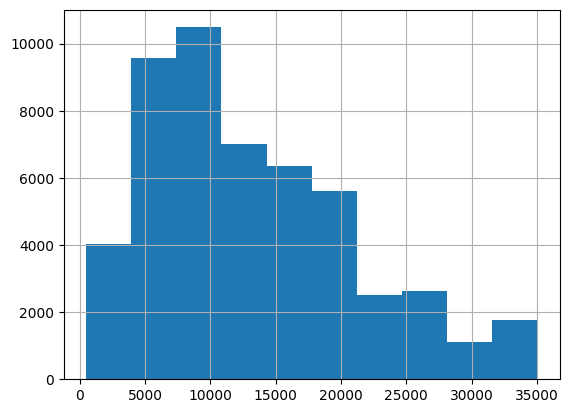

In [12]:
loans_df['funded_amount'].hist()

From the histogram we can see that `funded_amount` has a skewed distribution, so imputing with the median seems the best choice here.

In [13]:
loans_df_transform.impute_median('funded_amount')

<Axes: >

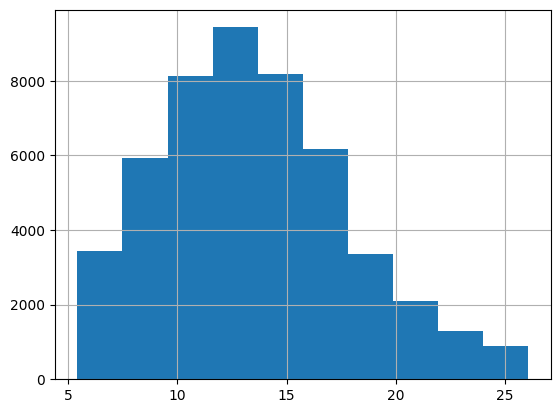

In [14]:
loans_df['int_rate'].hist()

`int_rate` also appears to have a slightly skewed dsitribution, so we'll impute with the median once again.

In [15]:
loans_df_transform.impute_median('int_rate')

Now we can check that all the missing values in our data have been dealt with.

In [16]:
loans_info.percentage_null_count()

Unnamed: 0                    0.0
id                            0.0
member_id                     0.0
loan_amount                   0.0
funded_amount                 0.0
funded_amount_inv             0.0
term                          0.0
int_rate                      0.0
instalment                    0.0
grade                         0.0
sub_grade                     0.0
employment_length             0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_date                    0.0
loan_status                   0.0
payment_plan                  0.0
purpose                       0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_credit_line          0.0
inq_last_6mths                0.0
open_accounts                 0.0
total_accounts                0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_payment                 0.0
total_payment_inv             0.0
total_rec_prnc

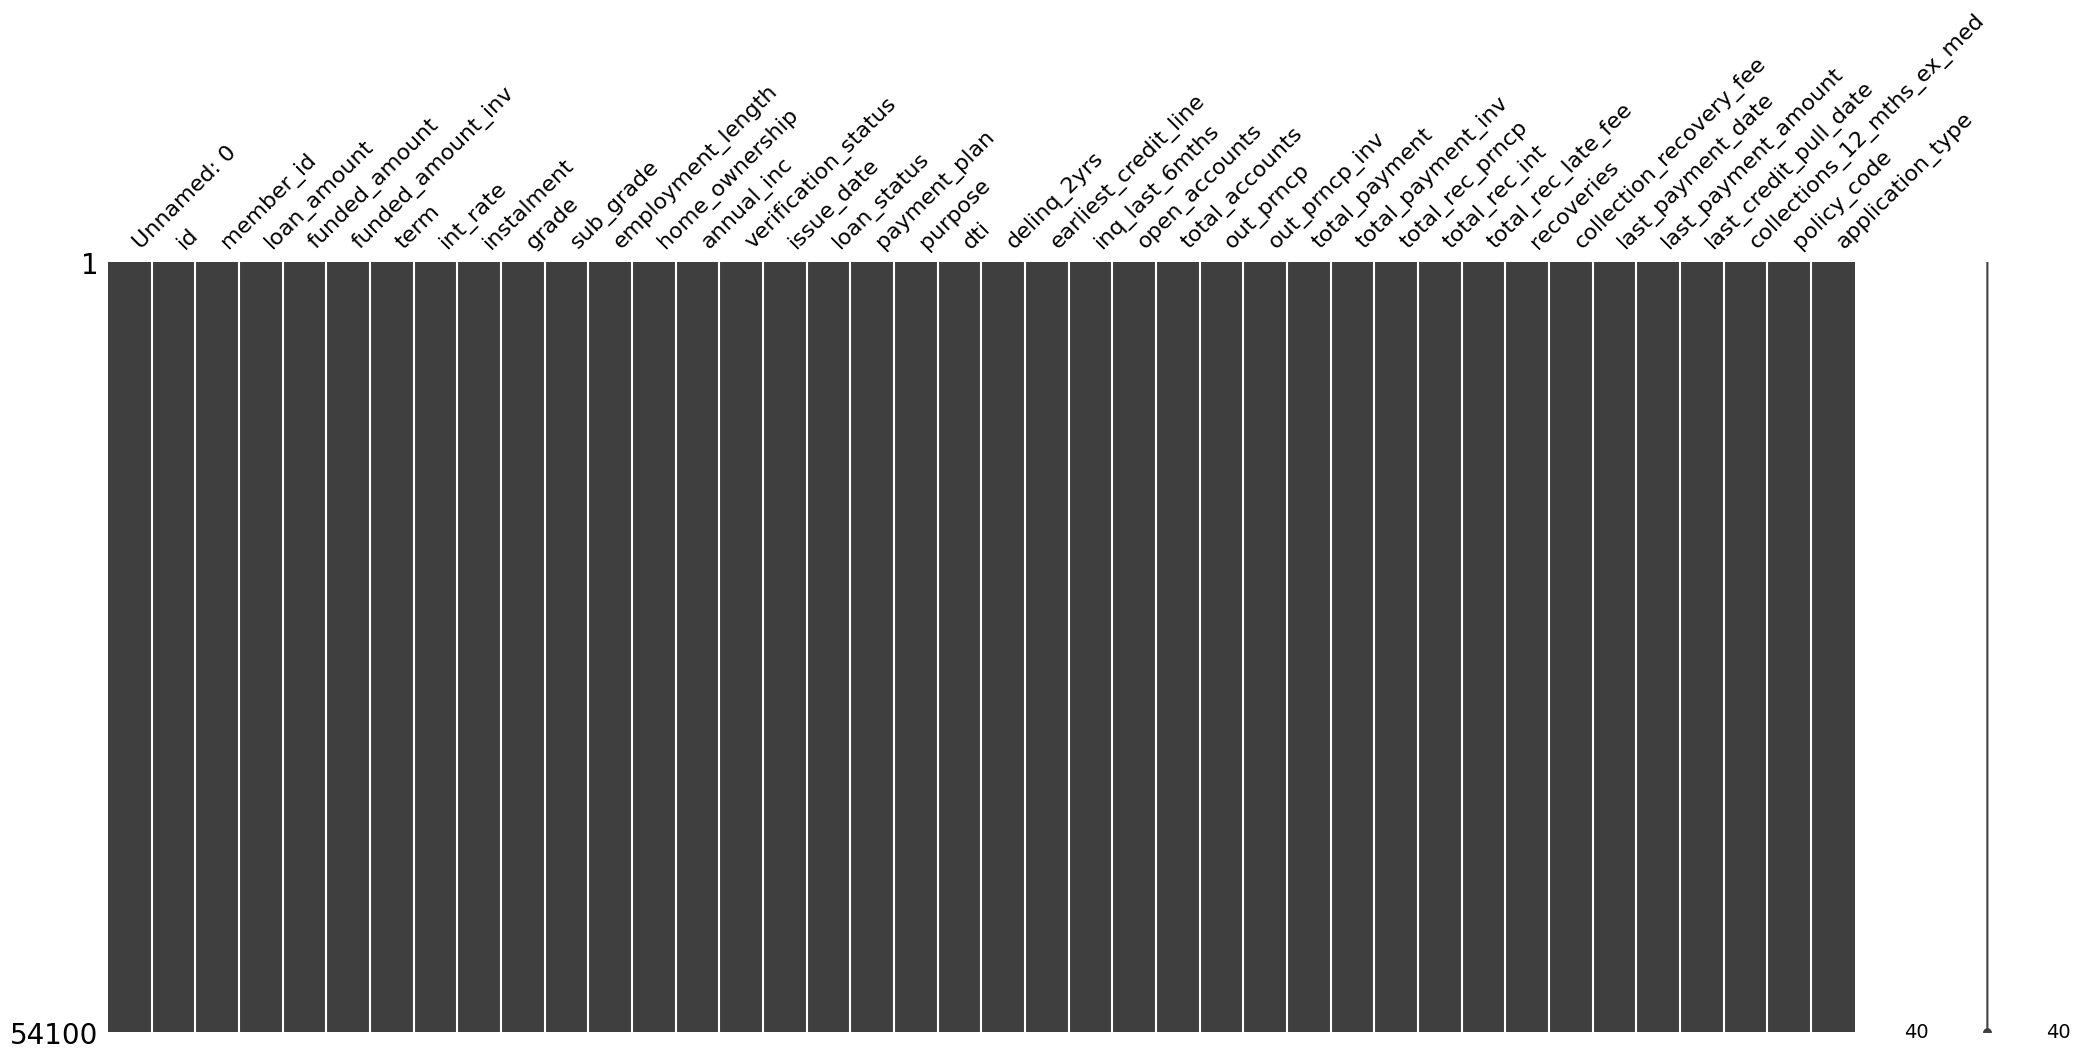

In [17]:
from plotter import Plotter

loans_plotter = Plotter(loans_df)

loans_plotter.plot_nulls()

The next step of the data cleaning process is to identify any skewed columns and transform the data if needed.

In [18]:
loans_df.skew(numeric_only=True)

Unnamed: 0                     0.000830
id                             2.369415
member_id                      2.204549
loan_amount                    0.804312
funded_amount                  0.869102
funded_amount_inv              0.814251
int_rate                       0.456055
instalment                     0.996150
annual_inc                     8.735737
dti                            0.189020
delinq_2yrs                    5.318818
inq_last_6mths                 3.243836
open_accounts                  1.059493
total_accounts                 0.780083
out_prncp                      2.352526
out_prncp_inv                  2.352946
total_payment                  1.269266
total_payment_inv              1.258474
total_rec_prncp                1.262007
total_rec_int                  2.203625
total_rec_late_fee            13.258472
recoveries                    14.382675
collection_recovery_fee       27.794716
last_payment_amount            2.496079
collections_12_mths_ex_med    20.298064


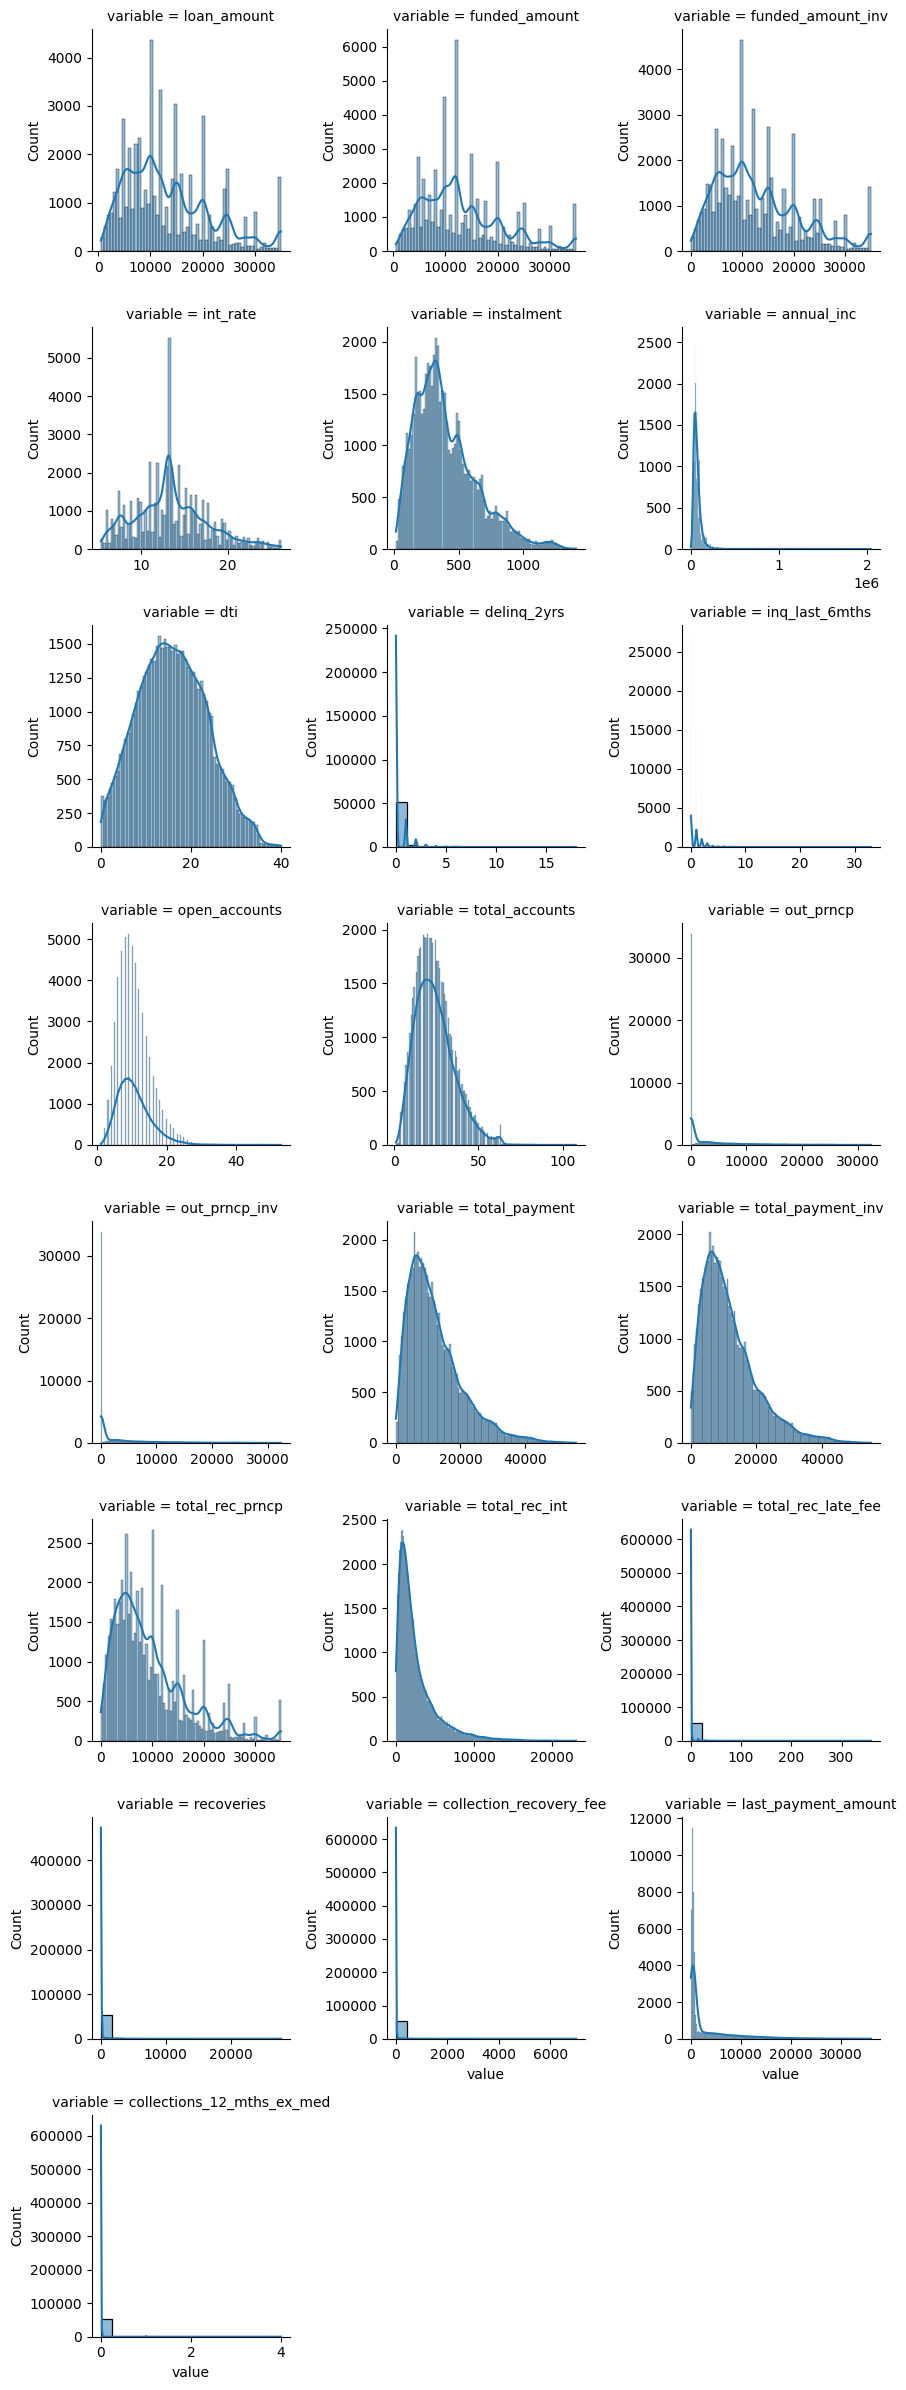

In [19]:
numeric_features = ['loan_amount',
                    'funded_amount',
                    'funded_amount_inv',
                    'int_rate',
                    'instalment',
                    'annual_inc',
                    'dti',
                    'delinq_2yrs',
                    'inq_last_6mths',
                    'open_accounts',
                    'total_accounts',
                    'out_prncp',
                    'out_prncp_inv',
                    'total_payment',
                    'total_payment_inv',
                    'total_rec_prncp',
                    'total_rec_int',
                    'total_rec_late_fee',
                    'recoveries',
                    'collection_recovery_fee',
                    'last_payment_amount',
                    'collections_12_mths_ex_med',
                    ]

loans_plotter.plot_distributions(numeric_features)

Looking at the output from `.skew()` and the histogram plots, we can see that many of the columns are positively skewed. We will apply transformations to columns with a skew > 1.0 in order to reduce the skew. First, we'll make a copy of the dataframe, then test the log transformation on the copy before applying it to `loans_df` where appropriate.

In [20]:
log_df = loans_df.copy()
log_df_transform = DataFrameTransform(log_df)

log_df_transform.log_transform('annual_inc')
log_df_transform.log_transform('delinq_2yrs')
log_df_transform.log_transform('inq_last_6mths')
log_df_transform.log_transform('open_accounts')
log_df_transform.log_transform('out_prncp')
log_df_transform.log_transform('out_prncp_inv')
log_df_transform.log_transform('total_payment')
log_df_transform.log_transform('total_payment_inv')
log_df_transform.log_transform('total_rec_prncp')
log_df_transform.log_transform('total_rec_int')
log_df_transform.log_transform('total_rec_late_fee')
log_df_transform.log_transform('recoveries')
log_df_transform.log_transform('collection_recovery_fee')
log_df_transform.log_transform('last_payment_amount')
log_df_transform.log_transform('collections_12_mths_ex_med')

log_df.skew(numeric_only=True)

Unnamed: 0                     0.000830
id                             2.369415
member_id                      2.204549
loan_amount                    0.804312
funded_amount                  0.869102
funded_amount_inv              0.814251
int_rate                       0.456055
instalment                     0.996150
annual_inc                     0.141818
dti                            0.189020
delinq_2yrs                    5.408360
inq_last_6mths                 1.969912
open_accounts                 -0.468820
total_accounts                 0.780083
out_prncp                      0.573256
out_prncp_inv                  0.573330
total_payment                 -0.753940
total_payment_inv             -2.770246
total_rec_prncp               -0.916175
total_rec_int                 -0.563589
total_rec_late_fee             5.517524
recoveries                     3.821052
collection_recovery_fee        5.413147
last_payment_amount            0.130825
collections_12_mths_ex_med    65.029173


We can see that applying a log transform to the skewed columns has reduced the skew in most cases. However there are still some columns with strong skews so it is worth trying another type of transformation in these cases.

In [21]:
# Permanently applying the log transform to columns where it was effective
loans_df_transform.log_transform('annual_inc')
loans_df_transform.log_transform('open_accounts')
loans_df_transform.log_transform('out_prncp')
loans_df_transform.log_transform('out_prncp_inv')
loans_df_transform.log_transform('total_rec_prncp')
loans_df_transform.log_transform('total_rec_int')
loans_df_transform.log_transform('last_payment_amount')

# Trying the Box-Cox transform on a copy of the dataframe
boxcox_df = loans_df.copy()
boxcox_df_transform = DataFrameTransform(boxcox_df)

boxcox_df_transform.boxcox_transform('delinq_2yrs')
boxcox_df_transform.boxcox_transform('inq_last_6mths')
boxcox_df_transform.boxcox_transform('total_payment')
boxcox_df_transform.boxcox_transform('total_payment_inv')
boxcox_df_transform.boxcox_transform('total_rec_late_fee')
boxcox_df_transform.boxcox_transform('recoveries')
boxcox_df_transform.boxcox_transform('collection_recovery_fee')
boxcox_df_transform.boxcox_transform('collections_12_mths_ex_med')

boxcox_df.skew(numeric_only=True)

Unnamed: 0                     0.000830
id                             2.369415
member_id                      2.204549
loan_amount                    0.804312
funded_amount                  0.869102
funded_amount_inv              0.814251
int_rate                       0.456055
instalment                     0.996150
annual_inc                     0.141818
dti                            0.189020
delinq_2yrs                    2.867241
inq_last_6mths                 0.954658
open_accounts                 -0.468820
total_accounts                 0.780083
out_prncp                      0.573256
out_prncp_inv                  0.573330
total_payment                 -0.117452
total_payment_inv             -0.392163
total_rec_prncp               -0.916175
total_rec_int                 -0.563589
total_rec_late_fee             5.885766
recoveries                     4.470931
collection_recovery_fee        6.845609
last_payment_amount            0.130825
collections_12_mths_ex_med    17.489168


Applying a Box-Cox transform has further reduced the skew in most cases. For the remaining skewed columns, we will next try a Yeo-Johnson transform.

In [22]:
# Permanently applying the Box-Cox transform to columns where it was effective
loans_df_transform.boxcox_transform('inq_last_6mths')
loans_df_transform.boxcox_transform('total_payment')
loans_df_transform.boxcox_transform('total_payment_inv')

# Trying the Yeo-Johnson transform on a copy of the dataframe
yeojohnson_df = loans_df.copy()
yeojohnson_df_transform = DataFrameTransform(yeojohnson_df)

yeojohnson_df_transform.yeojohnson_transform('delinq_2yrs')
yeojohnson_df_transform.yeojohnson_transform('total_rec_late_fee')
yeojohnson_df_transform.yeojohnson_transform('recoveries')
yeojohnson_df_transform.yeojohnson_transform('collection_recovery_fee')
yeojohnson_df_transform.yeojohnson_transform('collections_12_mths_ex_med')

yeojohnson_df.skew(numeric_only=True)

Unnamed: 0                     0.000830
id                             2.369415
member_id                      2.204549
loan_amount                    0.804312
funded_amount                  0.869102
funded_amount_inv              0.814251
int_rate                       0.456055
instalment                     0.996150
annual_inc                     0.141818
dti                            0.189020
delinq_2yrs                    1.869919
inq_last_6mths                 0.954658
open_accounts                 -0.468820
total_accounts                 0.780083
out_prncp                      0.573256
out_prncp_inv                  0.573330
total_payment                 -0.117452
total_payment_inv             -0.392163
total_rec_prncp               -0.916175
total_rec_int                 -0.563589
total_rec_late_fee             5.289271
recoveries                     3.475667
collection_recovery_fee        3.618587
last_payment_amount            0.130825
collections_12_mths_ex_med    16.022786


While some of the remaining columns are still quite skewed, the Yeo-Johnson transform has produced lower values of skew than the other transforms, so we will apply it to `loans_df`.

In [23]:
loans_df_transform.yeojohnson_transform('delinq_2yrs')
loans_df_transform.yeojohnson_transform('total_rec_late_fee')
loans_df_transform.yeojohnson_transform('recoveries')
loans_df_transform.yeojohnson_transform('collection_recovery_fee')
loans_df_transform.yeojohnson_transform('collections_12_mths_ex_med')

Observing the changes to the distributions visually after transforming:

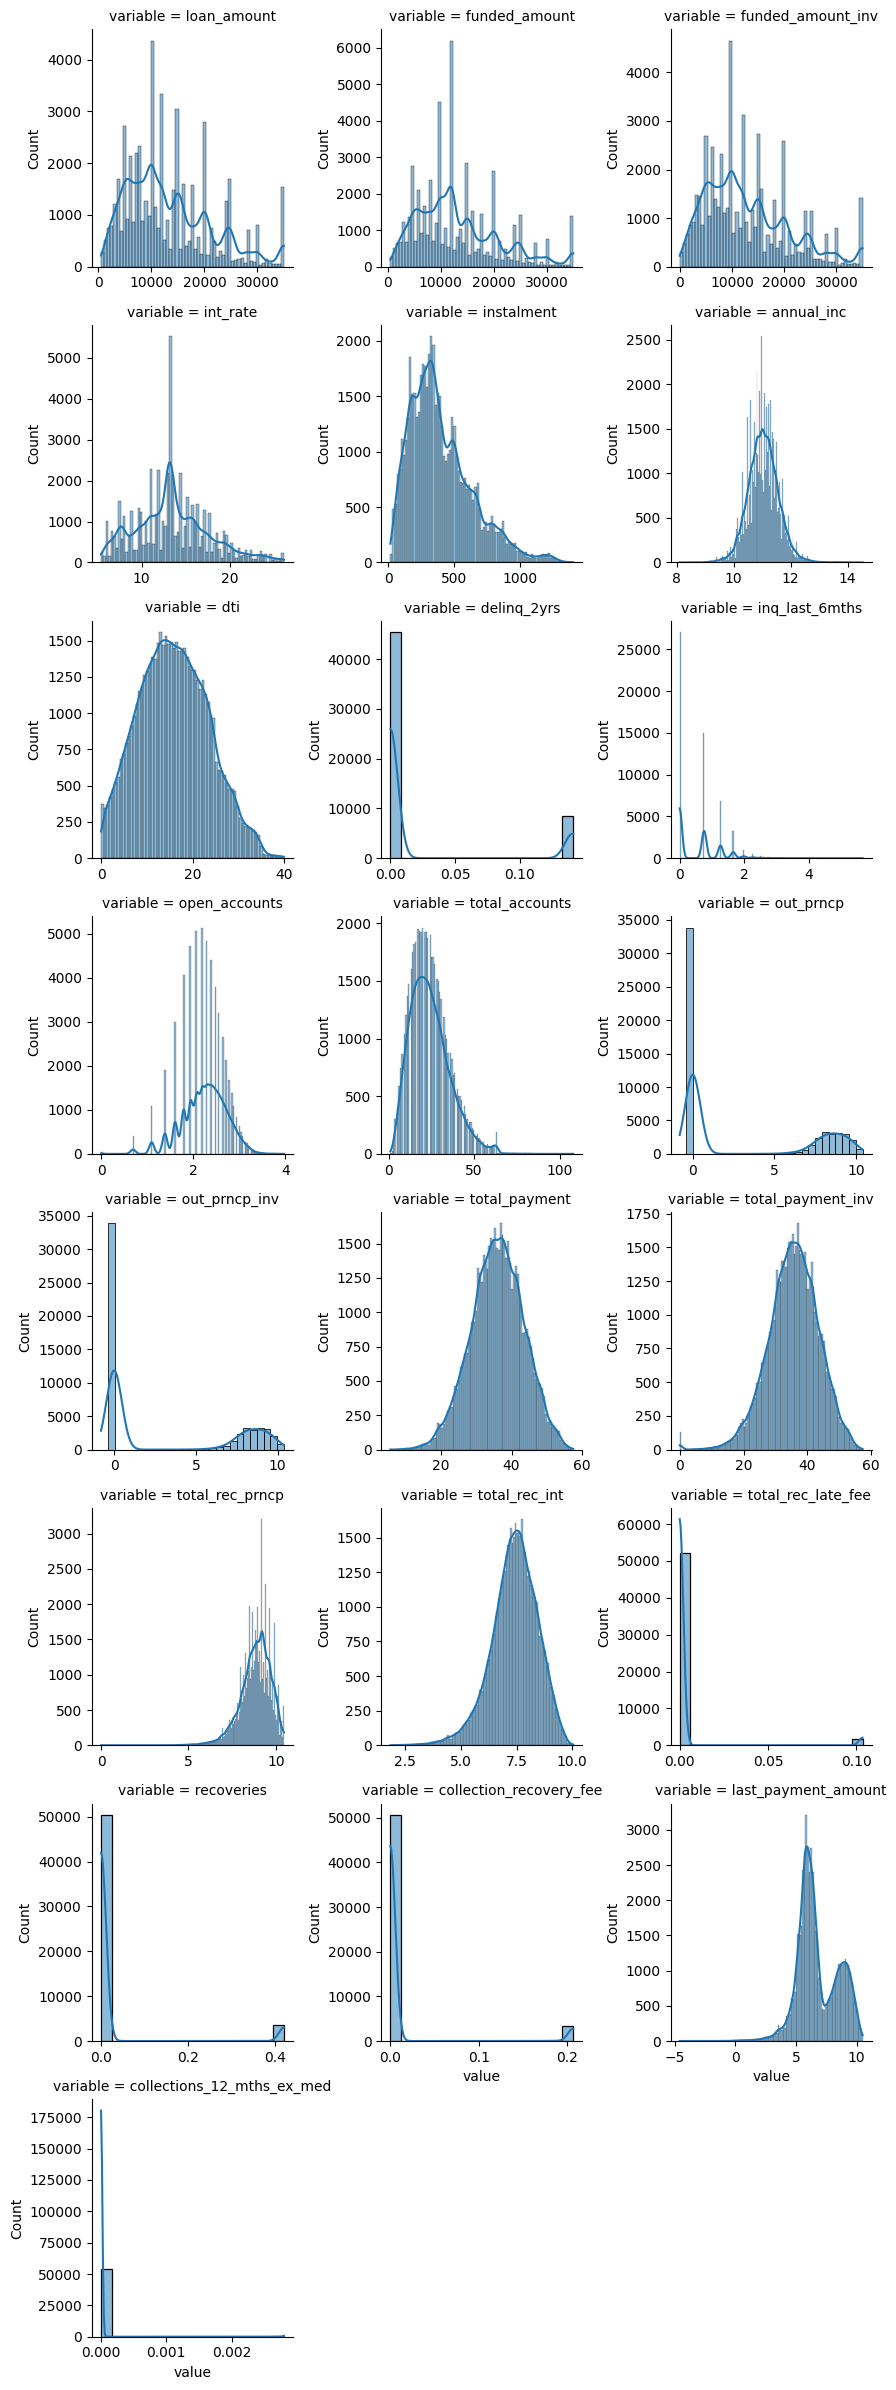

In [24]:
loans_plotter.plot_distributions(numeric_features)

The next step data cleaning is to determine which columns contain outliers and handle them accordingly.

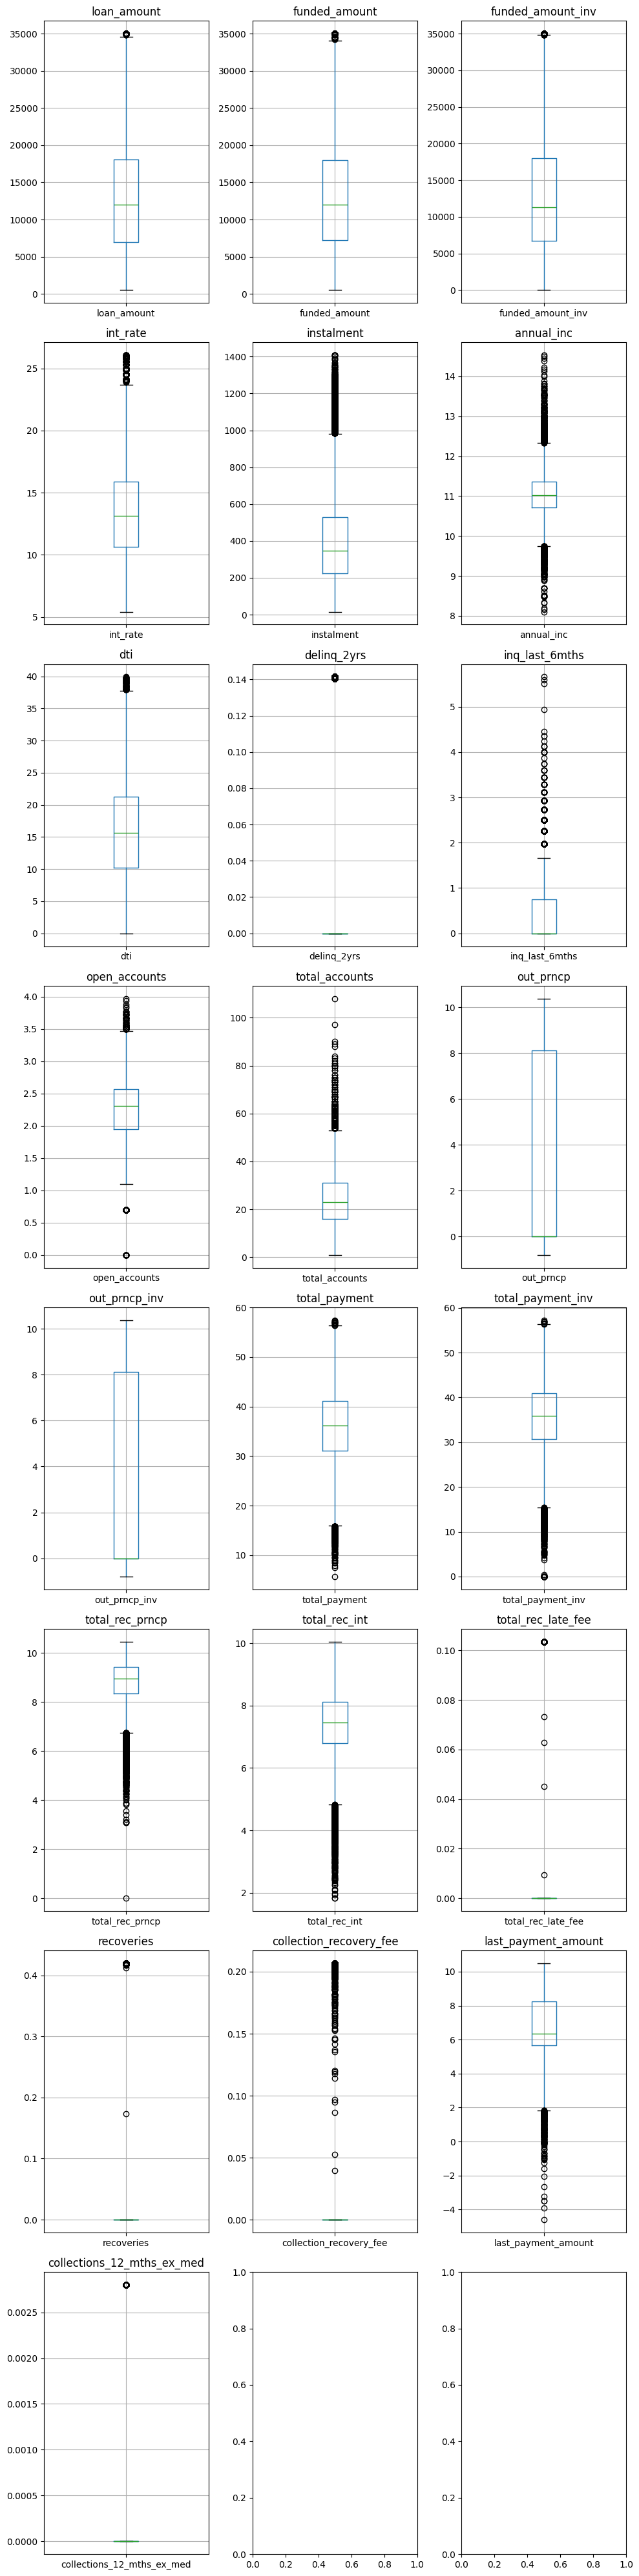

In [25]:
loans_plotter.plot_outliers(numeric_features)

Now that we have a visual representation of the outliers in the dataset, we can go ahead and remove them. But it is best not to remove the outliers in every column, as for some columns the 'outliers' are actually where valuable insights are possible. For example, in the plot of `delinq_2yrs`, every non-zero value is marked as an outlier, since most borrowers don't have any 30+ days past-due payments on their credit file for the past 2 years, so we want to retain the outliers here to gain more understanding about the instances where this was not the case.

In [26]:
# Removing outliers from appropriate columns
loans_df_transform.remove_outliers('loan_amount')
loans_df_transform.remove_outliers('funded_amount')
loans_df_transform.remove_outliers('funded_amount_inv')
loans_df_transform.remove_outliers('int_rate')
loans_df_transform.remove_outliers('instalment')
loans_df_transform.remove_outliers('annual_inc')
loans_df_transform.remove_outliers('dti')
loans_df_transform.remove_outliers('open_accounts')
loans_df_transform.remove_outliers('total_payment')
loans_df_transform.remove_outliers('total_payment_inv')
loans_df_transform.remove_outliers('total_rec_prncp')
loans_df_transform.remove_outliers('total_rec_int')
loans_df_transform.remove_outliers('last_payment_amount')

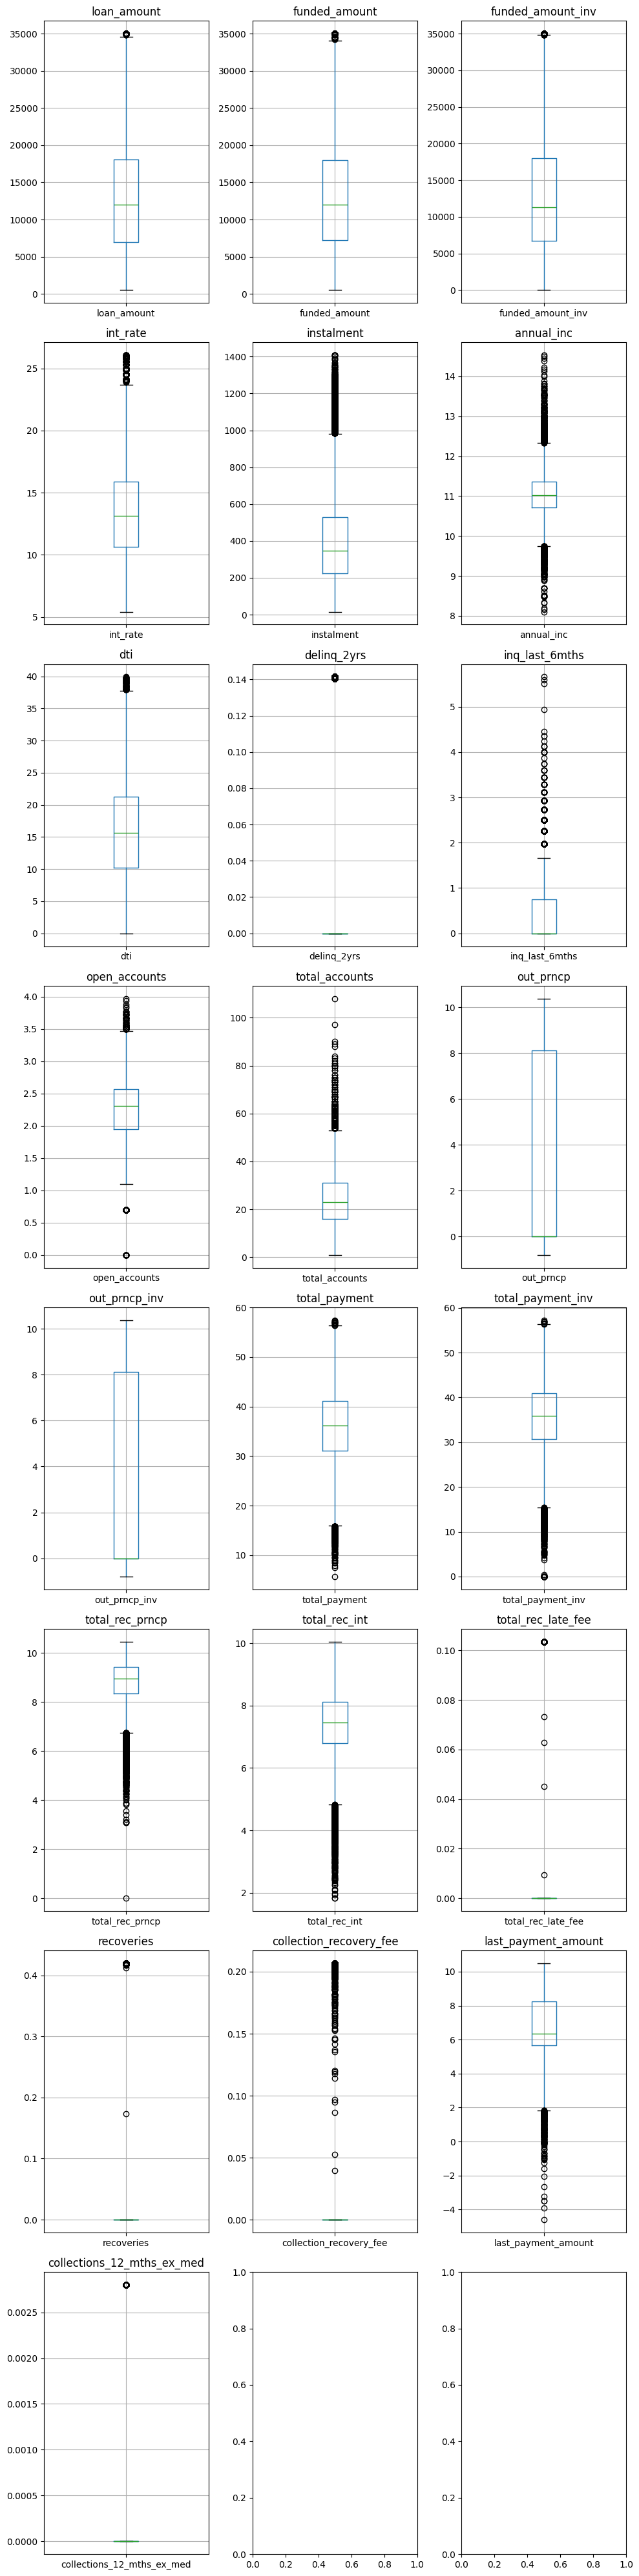

In [27]:
loans_plotter.plot_outliers(numeric_features)

Next we will compute the correlation matrix to check for issues of multicollinearity.

<Axes: >

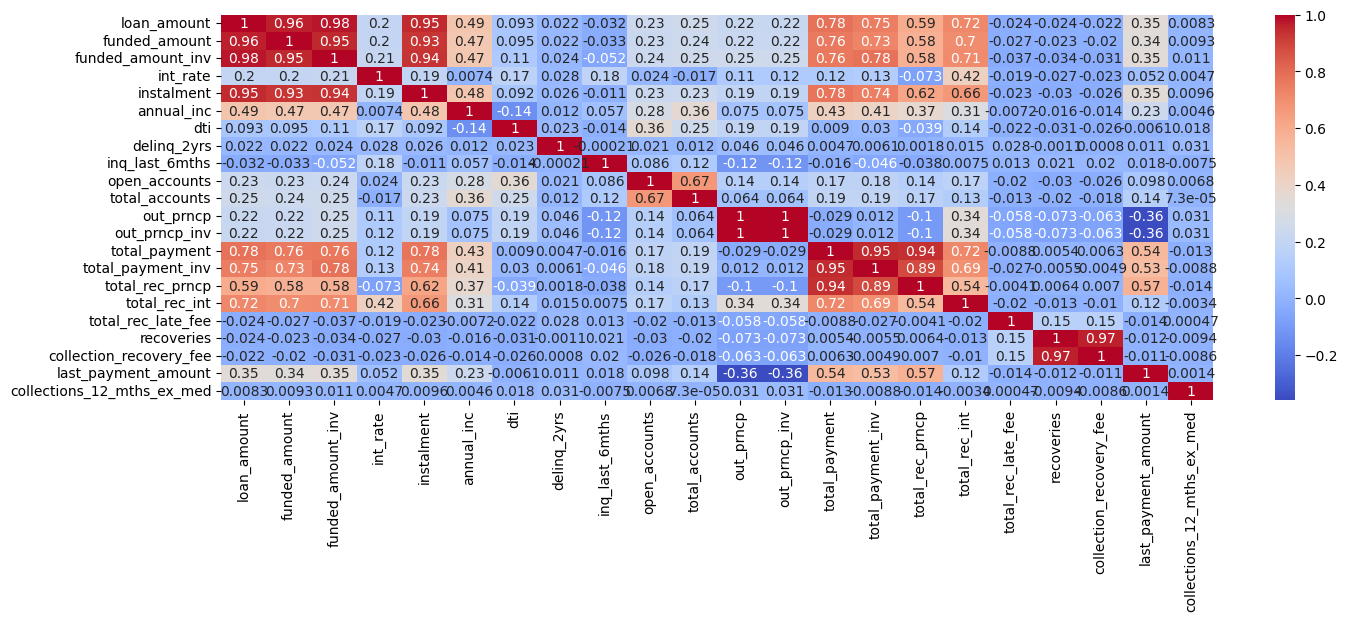

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (16,5))
sns.heatmap(loans_df[numeric_features].corr(), annot=True, cmap='coolwarm')

From the correlation matrix we can see that there are some variables which are strongly collinear. We will remove variables with correlation coefficients >= 0.95.

In [29]:
loans_df.drop(columns=['loan_amount', 'funded_amount_inv', 'out_prncp_inv', 'total_payment_inv', 
                       'collection_recovery_fee'], inplace=True)